In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

The dataset is a combination of item features and store features.

If there is less data, keep 90% for train. Do you agree?

In [67]:
sales=pd.read_csv('sales_prediction.csv')
sales.shape

(8523, 12)

In [3]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Percentage of missing values

In [5]:
(sales.isnull().sum()[sales.isnull().sum()>0]/sales.shape[0])*100

Item_Weight    17.165317
Outlet_Size    28.276428
dtype: float64

<AxesSubplot:>

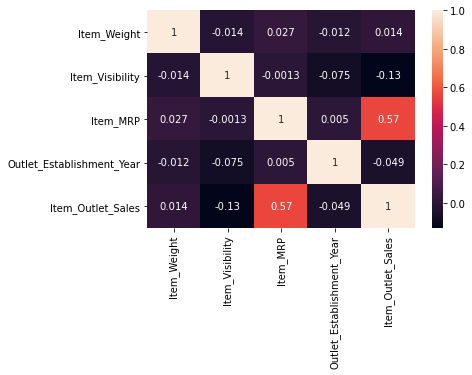

In [6]:
sns.heatmap(sales.corr(), annot=True)

In numerical columns, item MRP has the highest correlatio with the sales.

In [7]:
#statistical info
sales.describe()

#sales.describe(include='O')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
#check number of unique values for each categorical variable
sales.apply(lambda x:x.nunique())

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
#list of numerical columns
num_cols=sales.describe().columns
print(num_cols)
#list of categorical columns
cat_cols=sales.describe(include='O').columns
print(cat_cols)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')
Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

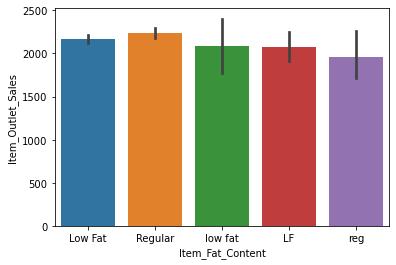

In [10]:
sns.barplot(x=sales['Item_Fat_Content'], y=sales['Item_Outlet_Sales'])

Item fat content doesn't impact the sales much.

In [11]:
sales['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

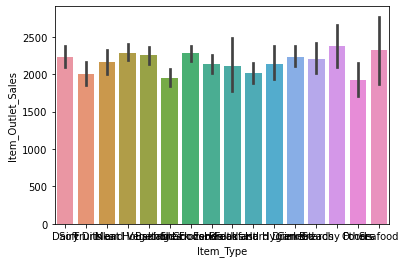

In [12]:
sns.barplot(x=sales['Item_Type'], y=sales['Item_Outlet_Sales'])

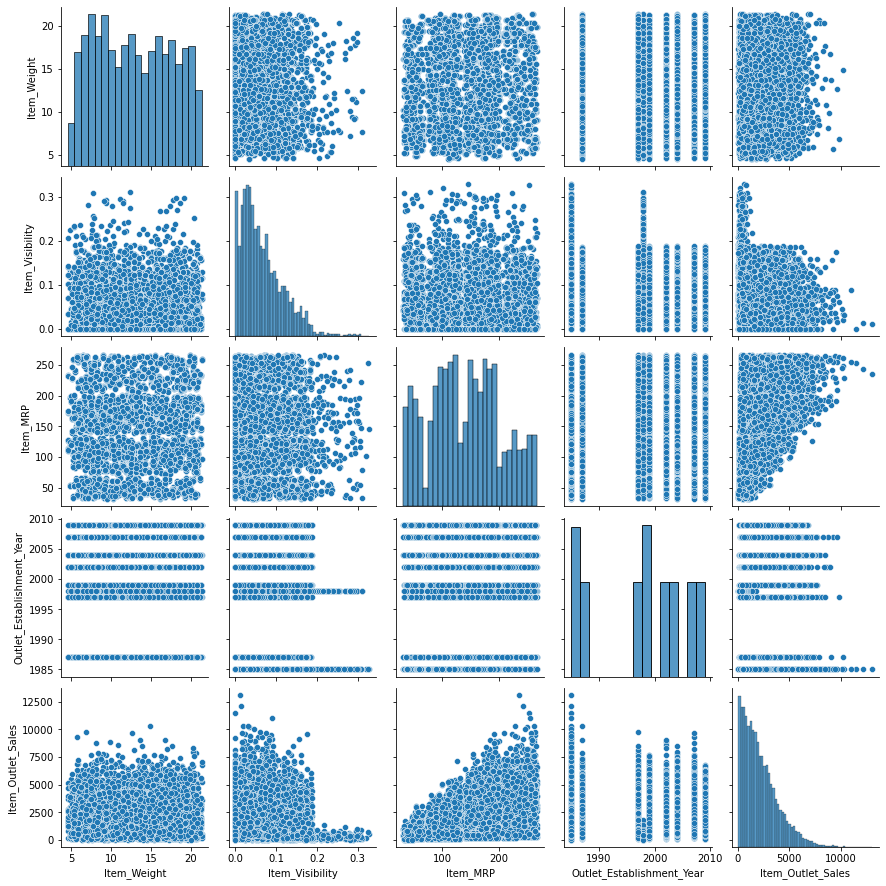

In [13]:
sns.pairplot(sales)

In [14]:
sales['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

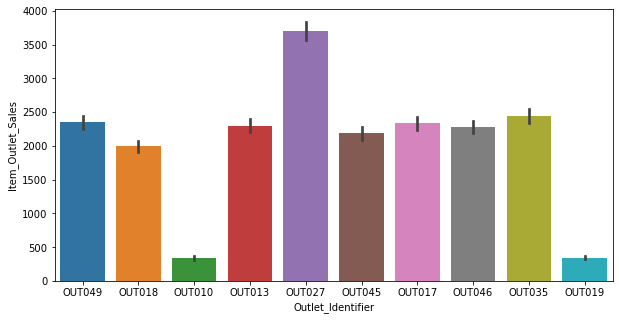

In [15]:
#increase the size of plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=sales['Outlet_Identifier'], y=sales['Item_Outlet_Sales'], ax=ax)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

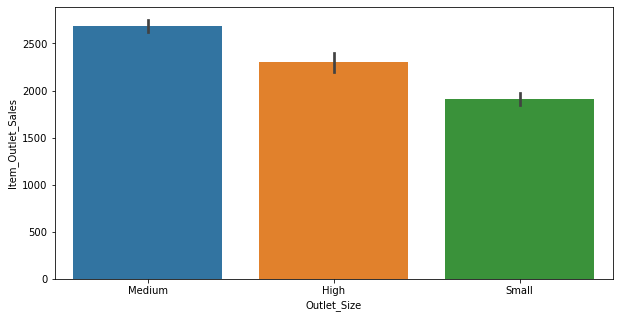

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=sales['Outlet_Size'], y=sales['Item_Outlet_Sales'], ax=ax)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

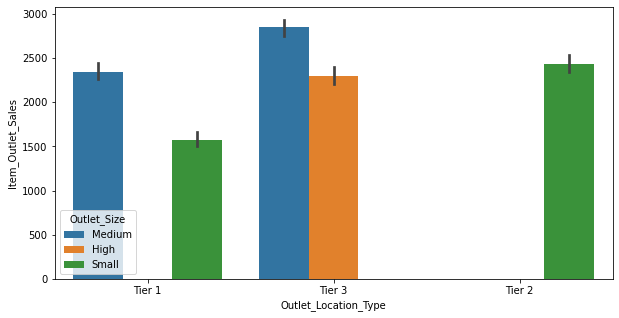

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=sales['Outlet_Location_Type'], y=sales['Item_Outlet_Sales'], ax=ax, hue=sales['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

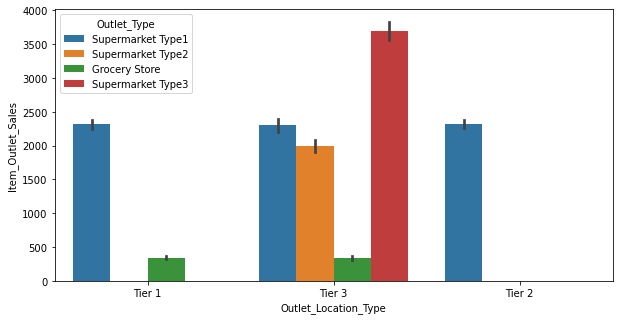

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=sales['Outlet_Location_Type'], y=sales['Item_Outlet_Sales'], ax=ax, hue=sales['Outlet_Type'])

In [19]:
table = pd.pivot_table(sales, values ='Item_Outlet_Sales',index =['Outlet_Location_Type', 'Outlet_Type'], aggfunc = np.mean) 
table

Item_Outlet_Sales
Outlet_Location_Type Outlet_Type                         
Tier 1               Grocery Store             340.329723
                     Supermarket Type1        2313.099451
Tier 2               Supermarket Type1        2323.990559
Tier 3               Grocery Store             339.351662
                     Supermarket Type1        2298.995256
                     Supermarket Type2        1995.498739
                     Supermarket Type3        3694.038558

In [20]:
table = pd.pivot_table(sales, values ='Item_Outlet_Sales', columns=['Outlet_Type'], index =['Outlet_Location_Type'], aggfunc = np.mean) 
table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,340.329723,2313.099451,NaN,NaN
Tier 2,NaN,2323.990559,NaN,NaN
Tier 3,339.351662,2298.995256,1995.498739,3694.038558


In [21]:
table = pd.pivot_table(sales, values ='Item_Outlet_Sales', columns=['Outlet_Size'], index =['Outlet_Location_Type'], aggfunc = np.mean) 
table

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,NaN,2348.354635,1576.192909
Tier 2,NaN,NaN,2438.841866
Tier 3,2298.995256,2847.959679,NaN


### Data Preprocessing

In [22]:
(sales.isnull().sum()[sales.isnull().sum()>0]/sales.shape[0])*100

Item_Weight    17.165317
Outlet_Size    28.276428
dtype: float64

In [23]:
#list of numerical columns
num_cols=sales.describe().columns

#list of categorical columns
cat_cols=sales.describe(include='O').columns

In [24]:
sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

combine categories with small number of values. That helps to increase prediction.

In [25]:
sales.shape

(8523, 12)

In [26]:
x=sales.drop(['Item_Outlet_Sales'], axis=1)
y=sales['Item_Outlet_Sales']
x.shape
y.shape

(8523,)

In [27]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42 )

In [28]:
print(x_train.shape)
x_test.shape
y_train.shape
y_test.shape

(5966, 11)


(2557,)

In [29]:
x_test.shape

(2557, 11)

In [30]:
x_test.isnull().sum()

Item_Identifier                0
Item_Weight                  440
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  720
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [31]:
num_cols=x_train.describe().columns
num_cols

cat_cols=x_train.describe(include='O').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

# EDA

In [32]:
x_train[num_cols].describe()
x_train[cat_cols].describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,FDF52,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


Need to check if the number of categories for a categorical variable is high. That will not be a good variable.

In [33]:
def visualize_num_cols(df,col):
    fig, ax =plt.subplots(1,2, figsize=(10,5))
    sns.histplot(df[col], ax=ax[0])
    sns.boxplot(df[col], ax=ax[1])

#fig, ax = plt.subplots(figsize=(10, 5))
#sns.barplot(x=sales['Outlet_Location_Type'], y=sales['Item_Outlet_Sales'], ax=ax, hue=sales['Outlet_Type'])

looks like a uniform distribution for item_weight.

C:\Users\uswr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\uswr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\uswr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\uswr\anaconda3\lib\site-p

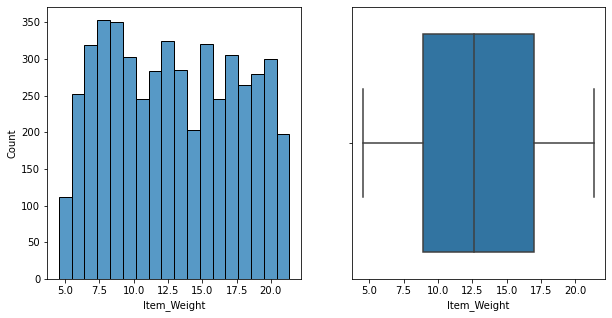

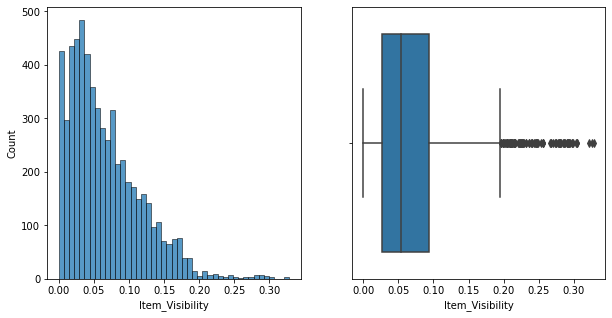

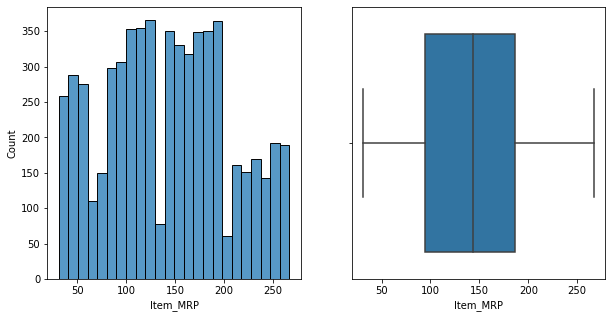

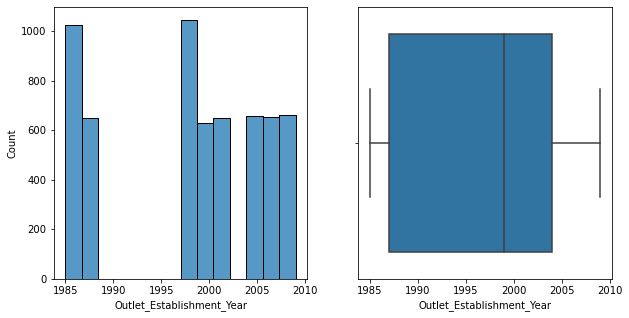

In [34]:
#to visualize all numeric features
for col in num_cols:
    visualize_num_cols(x_train,col)

Uniform distribution for item weight.<br/>
There are outliers in item visibility column. But should n't be removed right away. Need to think about them from domain perspective.<br/>
MRP looks like a multimodal distribution.<br/>
Distribution looks a little weird for the established year. Better to use a countplot.

C:\Users\uswr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

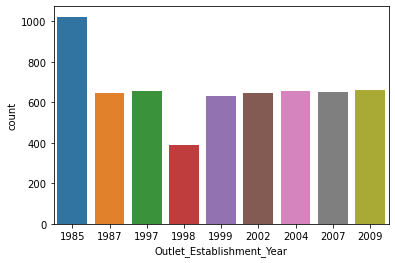

In [35]:
sns.countplot(x_train['Outlet_Establishment_Year'])

### why it is better to use a countplot for a discrete feature as compared to Histogram?

In [36]:
def visualize_cat_cols(df,col):
    fig, ax =plt.subplots(figsize=(15,5))
    sns.barplot(df[col],y_train)

C:\Users\uswr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\uswr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\uswr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\uswr\anaconda3\l

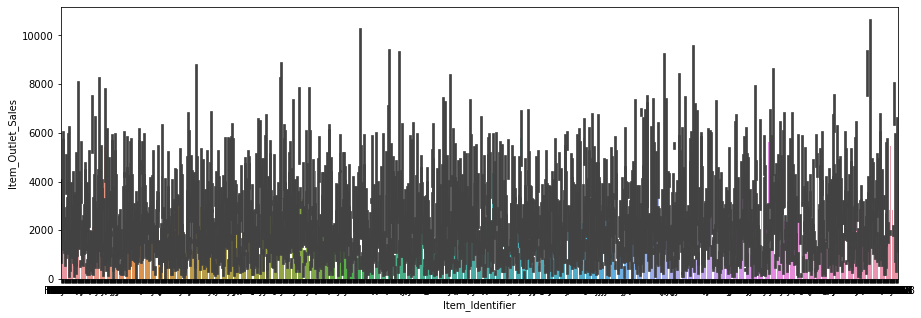

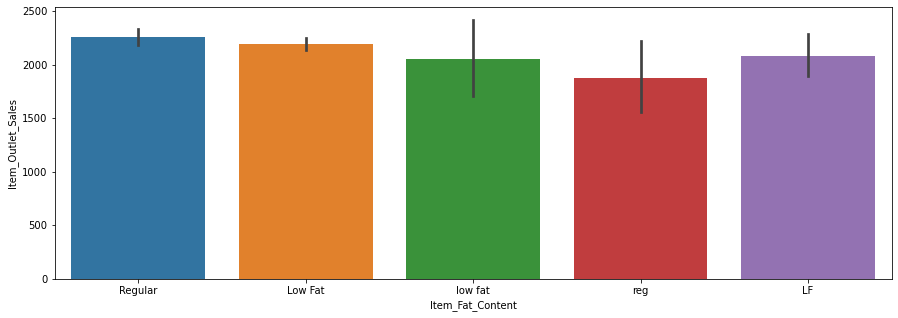

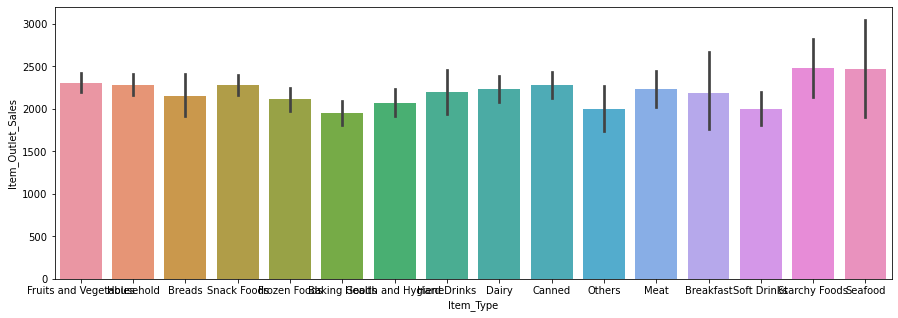

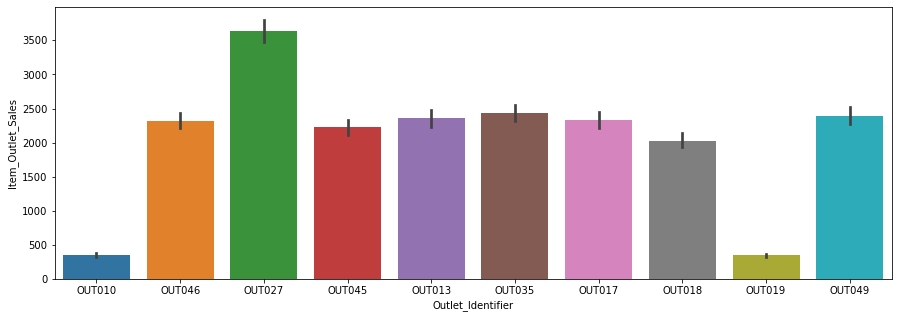

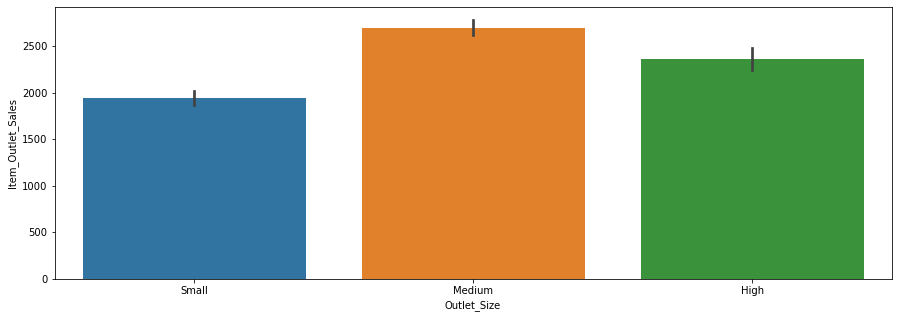

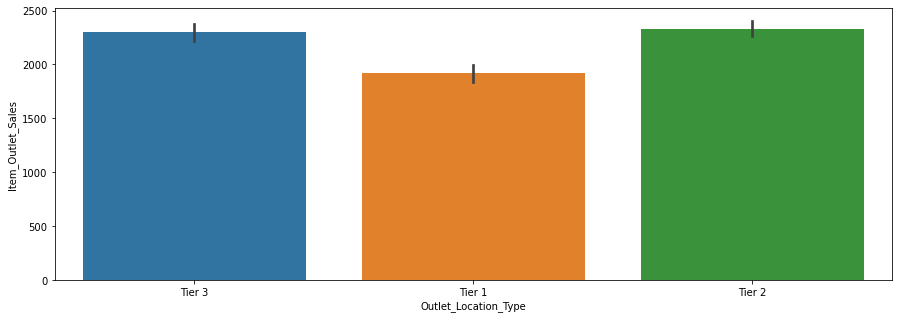

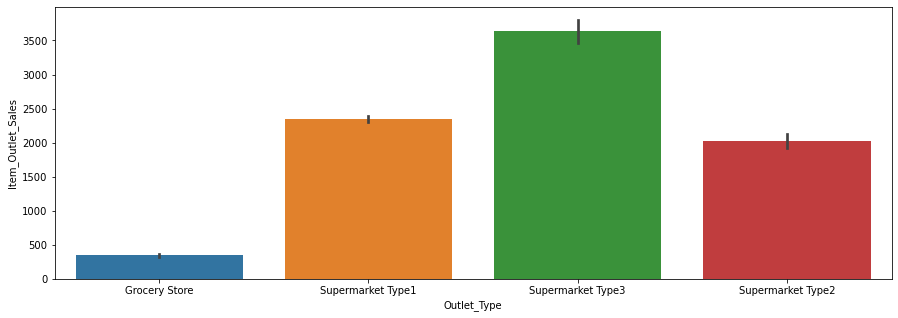

In [37]:
for col in cat_cols:
    visualize_cat_cols(x_train,col)

In [38]:
#dsply the list of categories in each categorical column
for i in cat_cols:
    if (i!='Item_Identifier'):
        print(i)
        print(sales[i].value_counts())

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Identifier
OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    

# Data Wrangling + Feature Engineering

How to compare the distribution of the training and test datasets?

### create new item type using item identifier

In [39]:
x_train['Item_Identifier'].value_counts()

FDF52    9
NCI54    9
NCI29    8
FDV60    8
FDV09    8
        ..
FDE38    1
FDB26    1
DRL59    1
FDU48    1
FDW60    1
Name: Item_Identifier, Length: 1543, dtype: int64

There are two many categoris item type. They can be reduced through some data processing.
Item type can be easily identified from item identifier.

In [40]:
x_train['Item_Identifier'].str[:2].value_counts()

FD    4269
NC    1137
DR     560
Name: Item_Identifier, dtype: int64

In [41]:
def standardize_item_types(df):
    df['Item_Type']=df['Item_Identifier'].str[:2]
    df['Item_Type']=df['Item_Type'].map({'FD':'Food','NC':'Non-consumables','DR':'Drink'})
    return df

In [42]:
standardize_item_types(x_train)
x_train['Item_Type'].value_counts()

Food               4269
Non-consumables    1137
Drink               560
Name: Item_Type, dtype: int64

### handling missing values

In [43]:
x_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

-'Item_Weight' and 'Outlet_Size' have missing vlues.<br/>
-'Item_Weight' will be filled with 'Item_Type'

### fill missing values for item_weight

In [44]:
#logic1-If item id is available, create mapping between item id and item weight.
item_id_weight=x_train.pivot_table(index='Item_Identifier', values=['Item_Weight']).reset_index()
item_id_weight
item_id_weight_mapping=dict(zip(item_id_weight['Item_Identifier'], item_id_weight['Item_Weight']))
item_id_weight_mapping

#logic2-if item id is not available(completely new item), create mapping betwween item type and item weight.
#use median value of item weight.
item_type_weight=x_train.pivot_table(index='Item_Type', values=['Item_Weight'], aggfunc='median').reset_index()
item_type_weight
item_type_weight_mapping=dict(zip(item_type_weight['Item_Type'], item_type_weight['Item_Weight']))
item_type_weight_mapping

{'Drink': 11.8, 'Food': 12.8, 'Non-consumables': 13.05}

for each item id, we have a single item weight. How to confirm this? <br/>
for each item type, we have different item ids. How the weight is calculated in that case?

In [45]:
#need to use map function with the column used for mapping when the missing values in a single column has been filled 
#using mutiple logics based on multiple columns
#in fillna(), use the column which has been used to fill the missing values and then use map function to fetch values from
#the dictionary

def impute_item_weight(df):
    #logic1-If item id is available, create mapping between item id and item weight.
    df.loc[:,'Item_Weight']= df.loc[:,'Item_Weight'].fillna(df.loc[:,'Item_Identifier'].map(item_id_weight_mapping))
 
    #logic2-if item id is not available(completely new item), create mapping betwween item type and item weight.
    df.loc[:,'Item_Weight']= df.loc[:,'Item_Weight'].fillna(df.loc[:,'Item_Type'].map(item_type_weight_mapping))
     
    return df

In [46]:
impute_item_weight(x_train)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.720,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.750,Low Fat,0.014301,Non-consumables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,8.600,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.350,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.350,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5734,FDY08,9.395,Regular,0.286345,Food,139.1838,OUT010,1998,NaN,Tier 3,Grocery Store
5191,FDC41,15.600,Low Fat,0.117575,Food,75.6670,OUT017,2007,NaN,Tier 2,Supermarket Type1
5390,NCQ53,17.600,Low Fat,0.018944,Non-consumables,237.3590,OUT045,2002,NaN,Tier 2,Supermarket Type1
860,FDL46,20.350,low fat,0.054363,Food,117.9466,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [47]:
x_train['Item_Weight'].isnull().sum()

0

### fill missing values for outlet_size

In [48]:
#use outlet type to fill missing values for outlet size
x_train['Outlet_Type'].value_counts()

Supermarket Type1    3893
Grocery Store         744
Supermarket Type3     668
Supermarket Type2     661
Name: Outlet_Type, dtype: int64

In [49]:
x_train.groupby(by=['Outlet_Type','Outlet_Size']).count()

Item_Identifier  Item_Weight  Item_Fat_Content  \
Outlet_Type       Outlet_Size                                                   
Grocery Store     Small                    355          355               355   
Supermarket Type1 High                     649          649               649   
                  Medium                   631          631               631   
                  Small                   1312         1312              1312   
Supermarket Type2 Medium                   661          661               661   
Supermarket Type3 Medium                   668          668               668   

                               Item_Visibility  Item_Type  Item_MRP  \
Outlet_Type       Outlet_Size                                         
Grocery Store     Small                    355        355       355   
Supermarket Type1 High                     649        649       649   
                  Medium                   631        631       631   
                  Small                   1312       1312      1312   
Supermarket Type2 Medium                   661        661       661   
Supermarket Type3 Medium                   668        668       668   

                               Outlet_Identifier  Outlet_Establishment_Year  \
Outlet_Type       Outlet_Size                                                 
Grocery Store     Small                      355                        355   
Supermarket Type1 High                       649                        649   
                  Medium                     631                        631   
                  Small                     1312                       1312   
Supermarket Type2 Medium                     661                        661   
Supermarket Type3 Medium                     668                        668   

                               Outlet_Location_Type  
Outlet_Type       Outlet_Size                        
Grocery Store     Small                         355  
Supermarket Type1 High                          649  
                  Medium                        631  
                  Small                        1312  
Supermarket Type2 Medium                        661  
Supermarket Type3 Medium                        668

In [50]:
from scipy.stats import mode

#mode[0] is used to select first mode value in case there are multiple mode values
outlet_type_size= x_train.pivot_table(index='Outlet_Type',values='Outlet_Size', aggfunc=(lambda x: mode(x).mode[0])).reset_index()

outlet_type_size_mapping=dict(zip(outlet_type_size['Outlet_Type'],outlet_type_size['Outlet_Size']))
outlet_type_size_mapping

{'Grocery Store': 'Small',
 'Supermarket Type1': 'Small',
 'Supermarket Type2': 'Medium',
 'Supermarket Type3': 'Medium'}

In [51]:
def impute_outlet_size(df):
    df.loc[:,'Outlet_Size']= df.loc[:,'Outlet_Size'].fillna(df.loc[:,'Outlet_Type'].map(outlet_type_size_mapping))
    return df

impute_outlet_size(x_train)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.720,Regular,0.147904,Food,116.6466,OUT010,1998,Small,Tier 3,Grocery Store
655,NCJ42,19.750,Low Fat,0.014301,Non-consumables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,8.600,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.350,Low Fat,0.118342,Food,222.6088,OUT045,2002,Small,Tier 2,Supermarket Type1
3528,FDY16,18.350,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5734,FDY08,9.395,Regular,0.286345,Food,139.1838,OUT010,1998,Small,Tier 3,Grocery Store
5191,FDC41,15.600,Low Fat,0.117575,Food,75.6670,OUT017,2007,Small,Tier 2,Supermarket Type1
5390,NCQ53,17.600,Low Fat,0.018944,Non-consumables,237.3590,OUT045,2002,Small,Tier 2,Supermarket Type1
860,FDL46,20.350,low fat,0.054363,Food,117.9466,OUT017,2007,Small,Tier 2,Supermarket Type1


In [52]:
x_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [53]:
x_train['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

### standardize item fat content. A dictionary can be used.

In [54]:
def standardize_item_fat_content(df):
    df['Item_Fat_Content'] =  df['Item_Fat_Content'].replace({'Low Fat':'Low_Fat',
                                                             'LF':'Low_Fat',
                                                             'low fat':'Low_Fat',
                                                             'reg':'Regular'})
    return df

In [55]:
standardize_item_fat_content(x_train)
x_train['Item_Fat_Content'].value_counts()

Low_Fat    3860
Regular    2106
Name: Item_Fat_Content, dtype: int64

### check for inconsistencies

In [56]:
x_train['Item_Type'].value_counts()

Food               4269
Non-consumables    1137
Drink               560
Name: Item_Type, dtype: int64

In [57]:
#taking code out of item_identifier to easy identification
x_train.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non-consumables  Low_Fat             1137
dtype: int64

##### Non-consumable items can't have a fat content. So fat content for non-consumable items should be set as Non-Edible.

In [58]:
def accurate_fat_content(df):
    df.loc[df['Item_Type']=='Non-consumables','Item_Fat_Content']= 'Non_Edible'
    return df

In [59]:
accurate_fat_content(x_train)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.720,Regular,0.147904,Food,116.6466,OUT010,1998,Small,Tier 3,Grocery Store
655,NCJ42,19.750,Non_Edible,0.014301,Non-consumables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,8.600,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.350,Low_Fat,0.118342,Food,222.6088,OUT045,2002,Small,Tier 2,Supermarket Type1
3528,FDY16,18.350,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
5734,FDY08,9.395,Regular,0.286345,Food,139.1838,OUT010,1998,Small,Tier 3,Grocery Store
5191,FDC41,15.600,Low_Fat,0.117575,Food,75.6670,OUT017,2007,Small,Tier 2,Supermarket Type1
5390,NCQ53,17.600,Non_Edible,0.018944,Non-consumables,237.3590,OUT045,2002,Small,Tier 2,Supermarket Type1
860,FDL46,20.350,Low_Fat,0.054363,Food,117.9466,OUT017,2007,Small,Tier 2,Supermarket Type1


In [60]:
x_train.groupby(by=['Item_Type','Item_Fat_Content']).size()

Item_Type        Item_Fat_Content
Drink            Low_Fat              517
                 Regular               43
Food             Low_Fat             2206
                 Regular             2063
Non-consumables  Non_Edible          1137
dtype: int64

In [61]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                5966 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                5966 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 719.3+ KB


In [62]:
def prepare_datasets(df):
    #step 1: standardize item types to reduce the number of categories
    df= standardize_item_types(df)
    
    #step 2: impute missing values for item_weight
    df= impute_item_weight(df)
    
    #step 3: impute missing values for outlet_size
    df=impute_outlet_size(df)
    
    #step 4: Remove inconsistencies from item fat content labels
    df=standardize_item_fat_content(df)
    
    #step 5: correct item fat content for non-consumable items
    df=accurate_fat_content(df)
    
    return df

In [63]:
x_test.isnull().sum()

Item_Identifier                0
Item_Weight                  440
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  720
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [64]:
x_train= prepare_datasets(x_train)
x_test=prepare_datasets(x_test)

In [65]:
x_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [66]:
x_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7503,FDI28,14.300,Low_Fat,0.026300,Food,79.4302,OUT013,1987,High,Tier 3,Supermarket Type1
2957,NCM17,7.930,Non_Edible,0.071136,Non-consumables,42.7086,OUT046,1997,Small,Tier 1,Supermarket Type1
7031,FDC14,14.500,Regular,0.041313,Food,42.0454,OUT049,1999,Medium,Tier 1,Supermarket Type1
1084,DRC36,13.000,Regular,0.044767,Drink,173.7054,OUT027,1985,Medium,Tier 3,Supermarket Type3
856,FDS27,10.195,Regular,0.012456,Food,197.5110,OUT035,2004,Small,Tier 2,Supermarket Type1
